<a href="https://colab.research.google.com/github/OmkarKotwalProject/Burger_King_Work/blob/main/BurgerKing_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Useful Libraries

In [1]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import nltk
import re
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
import sklearn.metrics as sm
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

!pip install pyspellchecker
!pip install Counter

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 2.7 MB 8.6 MB/s 
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5411 sha256=0e9614d0a84080aea16c9c2114f0ffde917f5392c8ac1eca9e3af37f35a547f9
  Stored in directory: /root/.cache/pip/wheels/f9/15/75/7a0462a00beb08e391f5da370ca409b56781d2501dba083fa3
Successfully built Counter
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",None)

Mounting the drive for accessing the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive/')



Mounted at /content/drive/


In [4]:
cd /content/drive/MyDrive/CUSTOMER_REVIEWS/ScrapedReviews/PROJECT SCRAPED REVIEWS/Burger King 3k/

/content/drive/MyDrive/CUSTOMER_REVIEWS/ScrapedReviews/PROJECT SCRAPED REVIEWS/Burger King 3k


In [5]:
df = pd.read_excel('All_Reviews_BK.xlsx')

In [6]:
#Keeping the original as it is.
df_review=df 

THIS IS A BACKUP LOAD OF ORIGINAL DATAFRAME, ONLY USE IF something goes wrong and need to load the dataset again

In [7]:
# #FOR EMPTYING THE DATAFRAME
# df_review.drop(columns=['Review','Sentiment'],inplace=True)

In [8]:
# #FOR RELOADING WITH ORIGINAL RAW DATA
# df = pd.read_excel('All_Reviews_DP.xlsx')
# df_review=df

BACKUP CODE END

In [9]:
df_review['Sentiment']=df_review['Sentiment'].astype(int)

In [10]:
print(df_review.head())
print(df_review.shape)

                                                                                                                                                                                                                                          Review  \
0                                                                                                                                                                                                                burnt Tikka was there in Burger   
1  No sauce Very bland Tikki was fresh but very dry burger overall Have had much better tasting Burger Kings burgers Incase you make different burgers for deal of the day offer please let know We would order without offers next time onwards   
2                                                                                                                                                                                                Everything was cold It wasnt even close to warm   
3                       

HOW MANY POSITIVE REVIEWS, HOW MANY NEGATIVE REVIEWS

In [11]:
print(df_review[df_review['Sentiment']==1].count())
print(df_review[df_review['Sentiment']==0].count())

Review       1476
Sentiment    1476
dtype: int64
Review       1018
Sentiment    1018
dtype: int64


In [12]:
#Checking if any null values
df_review[df_review.isna().any(axis=1)]

,Review,Sentiment


PRE-PROCESSING!

1. Removing digits [\d]

In [13]:
df['Review']=df['Review'].replace('\d+','',regex=True)

2. Replacing special characters by empty space ‘ ‘ and dealing with any character that occurs more than twice: yummmmy => yummy

In [14]:
df_review['Review']=df_review['Review'].replace('\n', ' ',regex=True)
df_review['Review']=df_review['Review'].replace(('[^!|^.|^,|^;|^-|^@|^\w\s]'),"", regex = True)
for i in range(len(df_review)):
  sentence=df_review['Review'][i]
  sentence=sentence.replace('.', ' ')
  sentence=sentence.replace(',', ' ')
  sentence=sentence.replace('!', ' ')
  sentence=sentence.replace('.', ' ')
  sentence=sentence.replace(';', ' ')
  sentence=sentence.replace('-', ' ')
  sentence=sentence.replace('@', ' ')
  sentence=sentence.replace(')', ' ')
  sentence=sentence.replace('(', ' ')
  sentence=sentence.replace('{', ' ')
  sentence=sentence.replace('}', ' ')
  sentence=re.sub(r'(.)\1+', r'\1\1',sentence)   # yummmyyy => yummyy,  '     '=>'  '  #This line will remove char which occures more than 2 times consecutively.
  df_review['Review'][i]=sentence
print(df_review.head(10))

                                                                                                                                                                                                                                          Review  \
0                                                                                                                                                                                                                burnt Tikka was there in Burger   
1  No sauce Very bland Tikki was fresh but very dry burger overall Have had much better tasting Burger Kings burgers Incase you make different burgers for deal of the day offer please let know We would order without offers next time onwards   
2                                                                                                                                                                                                Everything was cold It wasnt even close to warm   
3                       

3. REMOVING CHARACTERS WHICH ONLY OCCUR ONCE! ALSO REPLACING TWO CONSECUTIVE SPACES BY ONE

In [15]:
cnter=0
while(cnter<2):
  for i in range(len(df_review)):
    new_sentence=" "
    sentence=df_review['Review'][i]    #get the row i.e. sentence
    words=sentence.split()  #makes a list of the words in the sentence
    for word in words:      #check every words length and if it is less than 2, remove it
      if len(word)<2:
        words.remove(word)
    new_sentence=new_sentence.join(words) #Create a new sentence by joining all the words in the list with " " as a separator
    df_review['Review'][i]=new_sentence   #replace current row i.e. sentence by the new sentence
  cnter=cnter+1

In [16]:
print(df_review.head(5))

                                                                                                                                                                                                                                          Review  \
0                                                                                                                                                                                                                burnt Tikka was there in Burger   
1  No sauce Very bland Tikki was fresh but very dry burger overall Have had much better tasting Burger Kings burgers Incase you make different burgers for deal of the day offer please let know We would order without offers next time onwards   
2                                                                                                                                                                                                Everything was cold It wasnt even close to warm   
3                       

4.FINDING MISSPELLED WORDS AND CORRECTING THEM!
Algorithm used for correcting words:

    Create a list of misspelled words found in the dataset.
    Create a list of correctly spelled words found in the dataset.
    Use similar() function of 'SequenceMatcher' for finding similarity between words from both lists. If it is greater than 0.8, create a dictionary (dict['misspelled word'=correctly spelled word).
    Now traverse the dataset, while checking a row, extract its misspelled words, check if misspelled word is in the dictionary, if it is then replace it with correctly spelled word.

In [17]:
#This creates a list of sets of misspelled words found in each row.
from spellchecker import SpellChecker
spell=SpellChecker()
mis_list=[]
for i in range(len(df_review)):
  sentence=df_review['Review'][i].split()
  mis_sent=spell.unknown(sentence)
  mis_list.append(mis_sent)
  if set() in mis_list:
    mis_list.remove(set())
print("first 50 row's Misspelled words but they are in [{misspelled words list from row 1},{misspelled words list from row 2}]: ",mis_list[0:50])

first 50 row's Misspelled words but they are in [{misspelled words list from row 1},{misspelled words list from row 2}]:  [{'tikki'}, {'recieve'}, {'recieved'}, {'rs'}, {'pls'}, {'wth'}, {'hr'}, {'veggi'}, {'zomato'}, {'bk'}, {'th'}, {'hrs', 'wooper'}, {'nonveg'}, {'sougie'}, {'recieved'}, {'halfcooked'}, {'choclate'}, {'st'}, {'pm'}, {'recd'}, {'bk'}, {'rs'}, {'zomato', 'dwn'}, {'yaara', 'yummyy'}, {'kfc'}, {'cheesey', 'jalepeno'}, {'delecious'}, {'zomato'}, {'silde'}, {'makhani'}, {'yucks'}, {'zomato', 'hrs'}, {'lattives'}, {'goregaon', 'oberoi'}, {'cripsy'}, {'pls'}, {'thanku', 'veryy', 'experincee', 'hungryy', 'st'}, {'bk'}, {'uneatable'}, {'pattie', 'visitrd'}, {'wantmy'}, {'rs'}, {'zomato'}, {'mozarella', 'cheessyy'}, {'tandoor'}, {'couldv'}, {'swiggy', 'zamato'}, {'oberoi'}, {'macd', 'oberoi', 'okish'}, {'oberoi'}]


In [18]:
#Creating a list of misspelled words. (Basically extracting each set element from the mis_list and putting it into mis_mis_list)

from collections import Counter
mis_mis_list=[]
for i in mis_list:
  for j in i:
    mis_mis_list.append(j.lower())   #just making the words lower before appending to mis_mis_list
   
print("first 50 Misspelled words:",mis_mis_list[0:50]) #LIST OF MISSPELLED WORDS   
print("Total misspelled words: ",len(mis_mis_list)) #Note: this list is not a 'unique mispelled words' list, it has repeated occurences of them.


#Finding common words and their occurrences in the mis_mis_list #Just a trial code for common words finder.
cnt=Counter(mis_mis_list)
cmmn=cnt.most_common(100)   
print(cmmn)

first 50 Misspelled words: ['tikki', 'recieve', 'recieved', 'rs', 'pls', 'wth', 'hr', 'veggi', 'zomato', 'bk', 'th', 'hrs', 'wooper', 'nonveg', 'sougie', 'recieved', 'halfcooked', 'choclate', 'st', 'pm', 'recd', 'bk', 'rs', 'zomato', 'dwn', 'yaara', 'yummyy', 'kfc', 'cheesey', 'jalepeno', 'delecious', 'zomato', 'silde', 'makhani', 'yucks', 'zomato', 'hrs', 'lattives', 'goregaon', 'oberoi', 'cripsy', 'pls', 'thanku', 'veryy', 'experincee', 'hungryy', 'st', 'bk', 'uneatable', 'pattie']
Total misspelled words:  2101
[('bk', 149), ('mcd', 113), ('oberoi', 100), ('churchgate', 87), ('kfc', 77), ('zomato', 57), ('mc', 45), ('tandoor', 41), ('rs', 37), ('donalds', 31), ('whoopers', 29), ('goregaon', 26), ('tikki', 22), ('yumm', 19), ('nonveg', 18), ('cheezos', 18), ('wooper', 17), ('mcds', 17), ('macd', 16), ('burgerking', 15), ('nd', 15), ('kheema', 13), ('jr', 13), ('st', 12), ('keema', 12), ('okayish', 12), ('pls', 10), ('pm', 10), ('chiken', 9), ('hr', 8), ('ppl', 8), ('rd', 7), ('dunkin'

In [19]:
#REMOVING NAMES FROM THE LIST of misspelled words
names_list=['bk','mcd','oberoi','churchgate','kfc','zomato','mc','tandoor','rs','goregaon','nonveg','macd','burgerking','donalds']
for name in names_list:
  for j in range(len(mis_mis_list)):
    if name in mis_mis_list:
      mis_mis_list.remove(name)
print("Final Misspelled words list after removing names: (Showing only first 50) ",mis_mis_list[0:50]) #This is the list of misseplled words!



#Trial code for common words finder, again.
cnt=Counter(mis_mis_list)
cmmn=cnt.most_common(100)   #Finding common words and their occurrences in the mis_mis_list     
print(cmmn)    

Final Misspelled words list after removing names: (Showing only first 50)  ['tikki', 'recieve', 'recieved', 'pls', 'wth', 'hr', 'veggi', 'th', 'hrs', 'wooper', 'sougie', 'recieved', 'halfcooked', 'choclate', 'st', 'pm', 'recd', 'dwn', 'yaara', 'yummyy', 'cheesey', 'jalepeno', 'delecious', 'silde', 'makhani', 'yucks', 'hrs', 'lattives', 'cripsy', 'pls', 'thanku', 'veryy', 'experincee', 'hungryy', 'st', 'uneatable', 'pattie', 'visitrd', 'wantmy', 'mozarella', 'cheessyy', 'couldv', 'swiggy', 'zamato', 'okish', 'varities', 'vry', 'yumm', 'goregoan', 'mcaloo']
[('whoopers', 29), ('tikki', 22), ('yumm', 19), ('cheezos', 18), ('wooper', 17), ('mcds', 17), ('nd', 15), ('kheema', 13), ('jr', 13), ('st', 12), ('keema', 12), ('okayish', 12), ('pls', 10), ('pm', 10), ('chiken', 9), ('hr', 8), ('ppl', 8), ('rd', 7), ('dunkin', 7), ('mcveggie', 7), ('recieved', 6), ('buger', 6), ('fastfood', 6), ('jalapeños', 6), ('oberio', 6), ('afternoon', 6), ('ps', 6), ('hrs', 5), ('yummyy', 5), ('pattie', 5), (

Finding a list of correctly spelled words!

In [20]:
#first, just creating a list of words found in the dataset
correct_word_list=[]
for i in range(len(df_review)):
  sentence=df_review['Review'][i]
  words=sentence.split()
  for word in words:
    correct_word_list.append(word.lower())
print(correct_word_list[0:50])


['burnt', 'tikka', 'was', 'there', 'in', 'burger', 'no', 'sauce', 'very', 'bland', 'tikki', 'was', 'fresh', 'but', 'very', 'dry', 'burger', 'overall', 'have', 'had', 'much', 'better', 'tasting', 'burger', 'kings', 'burgers', 'incase', 'you', 'make', 'different', 'burgers', 'for', 'deal', 'of', 'the', 'day', 'offer', 'please', 'let', 'know', 'we', 'would', 'order', 'without', 'offers', 'next', 'time', 'onwards', 'everything', 'was']


In [21]:
#We have to make both lists mis_mis_list and correct_words_list contain unique words, not repeated words or 'remove' won't work!
print("total of all words of misspelled word list:",len(mis_mis_list))
print("total of all words of correct word list+misspelled word list:",len(correct_word_list))
mis_mis_list=list(set(mis_mis_list))
correct_word_list=list(set(correct_word_list))
print("total of unique words of misspelled word list:",len(mis_mis_list))
print("total of unique words of correct word list+missplled word list:",len(correct_word_list))
print("total of unique words of names list:",len(names_list))

total of all words of misspelled word list: 1289
total of all words of correct word list+misspelled word list: 92888
total of unique words of misspelled word list: 792
total of unique words of correct word list+missplled word list: 5525
total of unique words of names list: 14


In [22]:
names_list=['bk','mcd','oberoi','churchgate','kfc','zomato','mc','tandoor','rs','goregaon','nonveg','macd','burgerking','donalds']
cnt=0
#Removing misspelled words from correct_word_list, found in mis_mis_list
for w in mis_mis_list:
  if w in correct_word_list:
    correct_word_list.remove(w)

#Removing names from correct_word_list, found in names_list
for n in names_list:
  if n in correct_word_list:
    correct_word_list.remove(n) 
print("correct word list length after removing misspelled words and names:",len(correct_word_list))

correct word list length after removing misspelled words and names: 4719


In [23]:
#Checking similarity between words from correct_word_list and mis_mis_list, if its more than 0.8, 
#do dictionary[misspelled word]=correct word
#TAKES 1 MINUTE+
from difflib import SequenceMatcher       #Library used for checking similarity

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()    #Function to check similarity!

dictionary={}
cnt=0
for cor_word in correct_word_list:
  for mis_word in mis_mis_list:
    ratio=similar(cor_word,mis_word)
    if(ratio>0.8):
      cnt=cnt+1
      dictionary[mis_word]=cor_word
print("This many words can be corrected: ",cnt)

This many words can be corrected:  574


In [24]:
#Replacing the misspelled words with correct words
#Takes almost 10 seconds
words_corrected_cnt=0
for i in range(len(df_review)):
  sentence=(df_review['Review'][i]).lower()
  
  misspelled_words=spell.unknown(sentence.split())
  #print("list:",misspelled_words)
  for misword in misspelled_words:
    if misword in dictionary:
      correct_word=dictionary[misword]
      print("before:",sentence)
      print("misspelled word: ",misword,"     ","correct word:",correct_word)
      print("After:",sentence)
      sentence=sentence.replace(misword,correct_word)
      words_corrected_cnt=words_corrected_cnt+1
  df_review['Review'][i]=sentence
  

before: no sauce very bland tikki was fresh but very dry burger overall have had much better tasting burger kings burgers incase you make different burgers for deal of the day offer please let know we would order without offers next time onwards
misspelled word:  tikki       correct word: tiki
After: no sauce very bland tikki was fresh but very dry burger overall have had much better tasting burger kings burgers incase you make different burgers for deal of the day offer please let know we would order without offers next time onwards
before: did not recieve my order properly one burger was missing
misspelled word:  recieve       correct word: receive
After: did not recieve my order properly one burger was missing
before: recieved the dry bread and chicken stuffing was pressed completely
misspelled word:  recieved       correct word: received
After: recieved the dry bread and chicken stuffing was pressed completely
before: very disappointed delivery time shown on app and when it is actu

In [25]:
#This many words were corrected and replaced
print(words_corrected_cnt)

585


5. Removing stopwords

In [26]:
print(df_review['Review'].head())

0                                                                                                                                                                                                                 burnt tikka was there in burger
1    no sauce very bland tiki was fresh but very dry burger overall have had much better tasting burger kings burgers incase you make different burgers for deal of the day offer please let know we would order without offers next time onwards
2                                                                                                                                                                                                 everything was cold it wasnt even close to warm
3                                                                                                                                                                                        did not receive my order properly one burger was missing
4                               

In [27]:
from nltk.corpus import stopwords
sw=stopwords.words("english")
print(sw)
#Removing the words below from the stopword list as they do impact the outcome when doing sentiment analysis. 
sw.append('would')
sw.remove('not')
sw.remove('no')
sw.remove('don\'t')
sw.remove('didn\'t')
sw.remove('wouldn\'t')
sw.remove('wouldn')
sw.remove('won\'t')
sw.remove('didn')
sw.remove('don')
sw.remove('isn\'t')
sw.remove('isn')
sw.remove('couldn\'t')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Making 'Review' lower so I can remove stopwords

In [28]:
df_review['Review']=df_review['Review'].str.lower()

In [29]:
df_review['Review']=df_review['Review'].apply(lambda x:" ".join(x for x in str(x).split() if x not in sw))
print(df_review.head())

                                                                                                                                                                                      Review  \
0                                                                                                                                                                         burnt tikka burger   
1  no sauce bland tiki fresh dry burger overall much better tasting burger kings burgers incase make different burgers deal day offer please let know order without offers next time onwards   
2                                                                                                                                                      everything cold wasnt even close warm   
3                                                                                                                                              not receive order properly one burger missing   
4                                       

In [30]:
#TOTAL WORDS AFTER REMOVING STOP WORDS!
p_list=[]
for i in range(len(df_review)):
  ent=df_review['Review'][i].split()
  p_list.append(ent)

word_list=[]
for element in p_list:
  for word in element:
    word_list.append(word)
print(len(word_list))

54586


Exploratory Data Analysis

a. For positive reviews

In [31]:
pos_reviews_list=[]
for rev in df_review[df_review['Sentiment']==1].Review:
  sent_list=rev.split()
  for w in sent_list:
    pos_reviews_list.append(w)


#Trial code for common words finder, again.
cnt=Counter(pos_reviews_list)
cmmn=cnt.most_common(100)   #Finding common words and their occurrences in the mis_mis_list     
print(cmmn)

[('burger', 1530), ('good', 820), ('king', 661), ('chicken', 654), ('burgers', 549), ('food', 493), ('fries', 478), ('place', 439), ('taste', 426), ('whopper', 402), ('veg', 323), ('service', 319), ('not', 276), ('also', 272), ('try', 266), ('one', 247), ('time', 233), ('really', 227), ('like', 219), ('best', 217), ('nice', 211), ('crispy', 205), ('staff', 191), ('great', 189), ('outlet', 184), ('meal', 175), ('well', 174), ('better', 171), ('ordered', 161), ('whooper', 155), ('mutton', 153), ('tasty', 152), ('cheese', 152), ('bk', 152), ('amazing', 150), ('order', 145), ('must', 145), ('yummy', 140), ('love', 136), ('quick', 135), ('visit', 135), ('fast', 128), ('mcdonalds', 126), ('much', 125), ('go', 121), ('patty', 117), ('mall', 117), ('tried', 116), ('mcd', 115), ('quality', 114), ('delicious', 114), ('awesome', 110), ('experience', 109), ('quite', 105), ('big', 103), ('loved', 102), ('ambience', 101), ('always', 100), ('huge', 99), ('first', 98), ('price', 95), ('size', 90), ('o

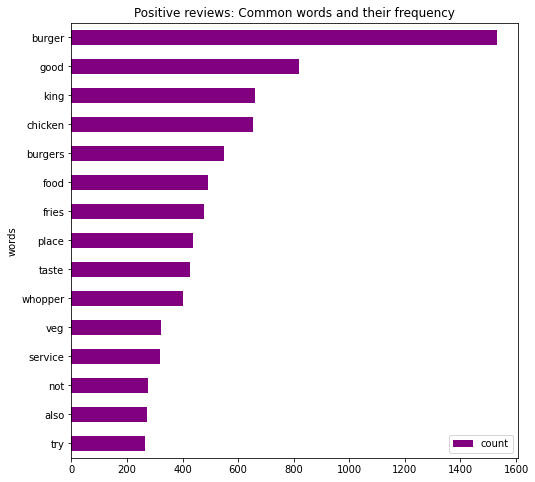

In [32]:
#cnt=Counter(df_review[df_review['Sentiment']==1].Review)
cnt=Counter(pos_reviews_list)
pos_common_words=pd.DataFrame(cnt.most_common(15), columns=['words','count'])
pos_common_words.head()

fig,ax=plt.subplots(figsize=(8,8))
pos_common_words.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='purple')
ax.set_title("Positive reviews: Common words and their frequency")
plt.show()

In [33]:
#Creating bi-grams
bigram_measures=nltk.collocations.BigramAssocMeasures()

finder=nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in df_review[df_review['Sentiment']==1].Review])

In [34]:
finder.apply_freq_filter(30)
bigram_scores=finder.score_ngrams(bigram_measures.pmi)
#print('_'.join(bigram_scores[0][0]))
print(len(bigram_scores))

30


In [35]:
bigram_scores[0][0]
cnt_list=[]
for gram in bigram_scores:
  x = '_'.join(gram[0])
  cnt_list.append((x,gram[1]))
print(cnt_list[0:10])

[('onion_rings', 9.214922976619091), ('pocket_friendly', 8.637598061217886), ('value_money', 8.518114508924867), ('churchgate_station', 8.322070854520607), ('oberoi_mall', 8.120727129678208), ('must_try', 6.2134864080016285), ('french_fries', 6.203388392862557), ('food_court', 6.181965922233898), ('cheesy_fries', 5.6846029687458834), ('mutton_whopper', 5.645848587606773)]


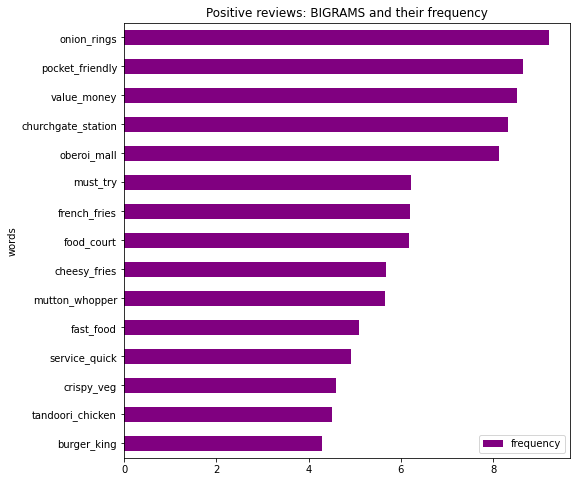

In [36]:
#cnt=Counter(df_review[df_review['Sentiment']==0].Review)
cnt=Counter(cnt_list)
pos_common_words=pd.DataFrame(cnt_list[0:15], columns=['words','frequency'])
pos_common_words.head()

fig,ax=plt.subplots(figsize=(8,8))
pos_common_words.sort_values(by='frequency').plot.barh(x='words',y='frequency',ax=ax,color='purple')
ax.set_title("Positive reviews: BIGRAMS and their frequency")
plt.show()

b. For Negative Reviews

In [37]:
neg_reviews_list=[]
for rev in df_review[df_review['Sentiment']==0].Review:
  sent_list=rev.split()
  for w in sent_list:
    neg_reviews_list.append(w)


#Trial code for common words finder, again.
cnt=Counter(neg_reviews_list)
cmmn=cnt.most_common(100)   #Finding common words and their occurrences in the mis_mis_list     
print(cmmn)

[('burger', 744), ('not', 555), ('king', 307), ('fries', 286), ('order', 257), ('chicken', 244), ('food', 223), ('good', 203), ('taste', 175), ('burgers', 172), ('no', 164), ('cold', 160), ('like', 149), ('ordered', 134), ('whopper', 132), ('time', 127), ('cheese', 118), ('delivery', 116), ('patty', 114), ('service', 113), ('bad', 107), ('one', 98), ('veg', 98), ('didnt', 96), ('even', 95), ('really', 85), ('quality', 83), ('also', 82), ('experience', 81), ('dont', 80), ('delivered', 76), ('get', 72), ('place', 72), ('better', 71), ('less', 69), ('got', 68), ('received', 67), ('worst', 66), ('crispy', 62), ('outlet', 60), ('much', 59), ('disappointed', 58), ('zomato', 58), ('never', 55), ('staff', 54), ('sauce', 52), ('bk', 52), ('fresh', 50), ('size', 50), ('money', 50), ('soggy', 49), ('mutton', 49), ('big', 49), ('peri', 48), ('whooper', 48), ('try', 48), ('well', 48), ('quantity', 46), ('go', 45), ('first', 42), ('onion', 42), ('pepsi', 42), ('late', 41), ('give', 41), ('meal', 41)

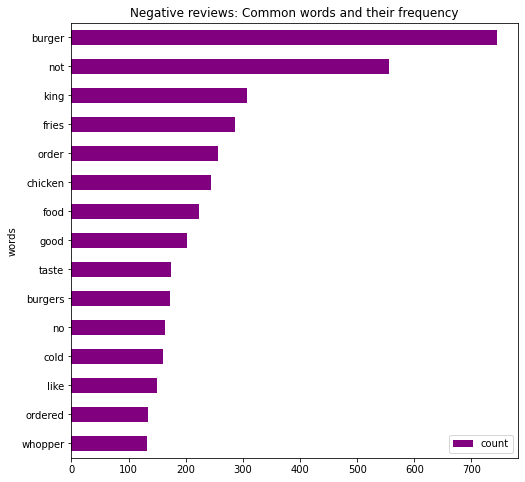

In [38]:
#cnt=Counter(df_review[df_review['Sentiment']==0].Review)
cnt=Counter(neg_reviews_list)
pos_common_words=pd.DataFrame(cnt.most_common(15), columns=['words','count'])
pos_common_words.head()

fig,ax=plt.subplots(figsize=(8,8))
pos_common_words.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='purple')
ax.set_title("Negative reviews: Common words and their frequency")
plt.show()

In [39]:
#Creating bi-grams
bigram_measures=nltk.collocations.BigramAssocMeasures()

finder=nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in df_review[df_review['Sentiment']==0].Review])

In [40]:
finder.apply_freq_filter(20)
bigram_scores=finder.score_ngrams(bigram_measures.pmi)
#print('_'.join(bigram_scores[0][0]))
print(len(bigram_scores))

13


In [41]:
bigram_scores[0][0]
cnt_list=[]
for gram in bigram_scores:
  x = '_'.join(gram[0])
  cnt_list.append((x,gram[1]))
print(cnt_list[0:10])

[('waste_money', 8.266351309391762), ('peri_peri', 7.5790015906911155), ('mutton_whopper', 5.897177550717373), ('french_fries', 5.893061442245141), ('bad_experience', 5.542078720763799), ('burger_king', 4.328494719596147), ('chicken_whopper', 4.3181156514359), ('not_fresh', 3.9887264411212353), ('not_good', 2.9969940571048355), ('not_even', 2.7996926167312193)]


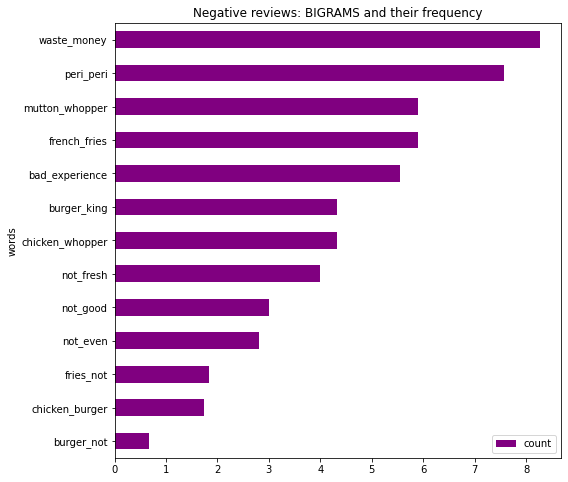

In [42]:
#cnt=Counter(df_review[df_review['Sentiment']==0].Review)
cnt=Counter(cnt_list)
pos_common_words=pd.DataFrame(cnt_list[0:15], columns=['words','count'])
pos_common_words.head()

fig,ax=plt.subplots(figsize=(8,8))
pos_common_words.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='purple')
ax.set_title("Negative reviews: BIGRAMS and their frequency")
plt.show()

6. Tokenization

In [43]:
#Tokenization done to apply Lemmatization
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer=nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]

df_review['Review']=df_review.Review.apply(lemmatize_text)
print(df_review.head())

                                                                                                                                                                                                                  Review  \
0                                                                                                                                                                                                  [burn, tikka, burger]   
1  [no, sauce, bland, tiki, fresh, dry, burger, overall, much, better, taste, burger, kings, burgers, incase, make, different, burgers, deal, day, offer, please, let, know, order, without, offer, next, time, onwards]   
2                                                                                                                                                                           [everything, cold, wasnt, even, close, warm]   
3                                                                                                                       

From tokenized to normal

In [44]:
df_review['NewReview'] = df_review['Review'].apply(lambda s1: ' '.join(map(str,s1)) )

print(df_review['NewReview'].head())

0                                                                                                                                                                         burn tikka burger
1    no sauce bland tiki fresh dry burger overall much better taste burger kings burgers incase make different burgers deal day offer please let know order without offer next time onwards
2                                                                                                                                                     everything cold wasnt even close warm
3                                                                                                                                                not receive order properly one burger miss
4                                                                                                                                          receive dry bread chicken stuff press completely
Name: NewReview, dtype: object


In [45]:
df_review['NewReview']=df_review['NewReview'].str.lower()
df_review.head()

,Review,Sentiment,NewReview
0,"[burn, tikka, burger]",0,burn tikka burger
1,"[no, sauce, bland, tiki, fresh, dry, burger, overall, much, better, taste, burger, kings, burgers, incase, make, different, burgers, deal, day, offer, please, let, know, order, without, offer, next, time, onwards]",0,no sauce bland tiki fresh dry burger overall much better taste burger kings burgers incase make different burgers deal day offer please let know order without offer next time onwards
2,"[everything, cold, wasnt, even, close, warm]",0,everything cold wasnt even close warm
3,"[not, receive, order, properly, one, burger, miss]",0,not receive order properly one burger miss
4,"[receive, dry, bread, chicken, stuff, press, completely]",0,receive dry bread chicken stuff press completely


# Sentiment Analysis

In [46]:
print("The number of samples in the dataset!")
pos_percent=(len(df_review[df_review['Sentiment']==1])/len(df_review)*100)
print("Positive reviews percentage: ",round(pos_percent,2),"%")
neg_percent=(len(df_review[df_review['Sentiment']==0])/len(df_review)*100)
print("Negative reviews percentage: ",round(neg_percent,2),"%")
print("Positive reviews: ",len(df_review[df_review['Sentiment']==1]))
print("Negative reviews: ",len(df_review[df_review['Sentiment']==0]))

The number of samples in the dataset!
Positive reviews percentage:  59.18 %
Negative reviews percentage:  40.82 %
Positive reviews:  1476
Negative reviews:  1018


Train-test split starts here!

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train_data,test_data=train_test_split(df_review,test_size=0.2,random_state=55) 

In [49]:
print(df_review.shape)
print('test_data(Positive):',test_data[test_data['Sentiment']==1].count())
print('test_data(Negative):',test_data[test_data['Sentiment']==0].count())

print("train_data (Positive):",train_data[train_data['Sentiment']==1].count())
print('train_data (Negative):',train_data[train_data['Sentiment']==0].count())

(2494, 3)
test_data(Positive): Review       305
Sentiment    305
NewReview    305
dtype: int64
test_data(Negative): Review       194
Sentiment    194
NewReview    194
dtype: int64
train_data (Positive): Review       1171
Sentiment    1171
NewReview    1171
dtype: int64
train_data (Negative): Review       824
Sentiment    824
NewReview    824
dtype: int64


In [50]:
X_train=train_data['NewReview']
y_train=train_data['Sentiment']
X_test=test_data['NewReview']
y_test=test_data['Sentiment']

In [51]:
print(X_train.head())
print(X_test.head())

1397                                                                                                                                                                                                                                                          taste not good although hot taste like sabzi
2130    order pepsi deliver half cup pepso full spill order king fry send fry burger whopper cook bread not fresh complain zomato order tell refund pay tax distance fee delivery charge restaurant pack charge tax receive favour money international brand service provide cheat par get order cold late
712                                                                                                                                            become much crowd sundays almost impossible three us get place sit burgers great big whoppers best class good service think keep counter like mcd help alot
176                                                                              one worst burger burge

7. Vectorizer

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
train_vectorizer=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii')
train_review_tfidf=train_vectorizer.fit_transform(X_train)

In [54]:
print(train_review_tfidf.shape)
type(train_review_tfidf)

(1995, 3733)


scipy.sparse.csr.csr_matrix

a. LOGISTIC REGRESSION

In [55]:
log_model=LogisticRegression().fit(train_review_tfidf, y_train)

In [56]:
cross_val_score(log_model,train_review_tfidf,y_train,scoring='accuracy',cv=5).mean()

0.8822055137844611

In [57]:
#USE THIS WHEN TESTING ON SPLIT TEST DATA
nr=train_vectorizer.transform(X_test)
log_model.predict(nr)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,

In [58]:
predicted=log_model.predict(nr)
p=pd.DataFrame(predicted)
actual=y_test

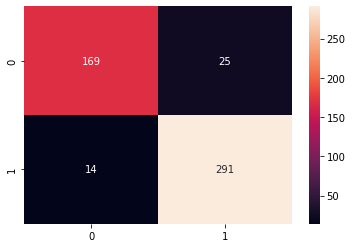

In [59]:
import seaborn as sns
cf_matrix=sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix,annot=True,fmt='g')

In [60]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       194
           1       0.92      0.95      0.94       305

    accuracy                           0.92       499
   macro avg       0.92      0.91      0.92       499
weighted avg       0.92      0.92      0.92       499



b. SVM

In [61]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='rbf',C=1,gamma=1)
svclassifier.fit(train_review_tfidf,y_train)

SVC(C=1, gamma=1)

In [62]:
nr=train_vectorizer.transform(X_test)
svclassifier.predict(nr)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,

In [63]:
predicted=svclassifier.predict(nr)
p=pd.DataFrame(predicted)
actual=y_test

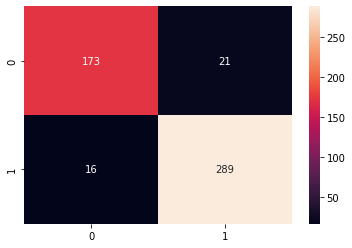

In [64]:
cf_matrix=sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix,annot=True,fmt='g')

In [65]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       194
           1       0.93      0.95      0.94       305

    accuracy                           0.93       499
   macro avg       0.92      0.92      0.92       499
weighted avg       0.93      0.93      0.93       499



Hypertuning SVM

In [66]:
# from sklearn.model_selection import GridSearchCV
# param_grid={'C':[0.1,1,10,100],
#             'gamma':[1,0.1,0.01,0.001],
#             'kernel':['rbf']}

# grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
# grid.fit(train_review_tfidf,y_train)

In [67]:
# print(grid.best_params_)
# print(grid.best_estimator_)

# TOPIC MODELLING

In [68]:
corpus_bert=pd.DataFrame(df_review[df_review['Sentiment']==0].NewReview)
corpus_lda=pd.DataFrame(df_review[df_review['Sentiment']==0].NewReview)


In [69]:
corpus_bert=corpus_bert.reset_index()
corpus_lda=corpus_lda.reset_index()

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
!pip install bertopic[visualization] --quiet

     |████████████████████████████████| 58 kB 3.3 MB/s 
     |████████████████████████████████| 88 kB 4.4 MB/s 
     |████████████████████████████████| 5.2 MB 39.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 79 kB 6.6 MB/s 
     |████████████████████████████████| 4.2 MB 38.4 MB/s 
     |████████████████████████████████| 1.2 MB 56.3 MB/s 
     |████████████████████████████████| 84 kB 2.4 MB/s 
     |████████████████████████████████| 636 kB 66.8 MB/s 
     |████████████████████████████████| 6.6 MB 43.2 MB/s 
     |████████████████████████████████| 1.1 MB 45.9 MB/s 


In [72]:
from bertopic import BERTopic

In [73]:
corpus=list(corpus_bert.NewReview)
print(corpus[0:5])

['burn tikka burger', 'no sauce bland tiki fresh dry burger overall much better taste burger kings burgers incase make different burgers deal day offer please let know order without offer next time onwards', 'everything cold wasnt even close warm', 'not receive order properly one burger miss', 'receive dry bread chicken stuff press completely']


In [74]:
bert_model=BERTopic(language="english", nr_topics=19)

In [75]:
topics,probs=bert_model.fit_transform(corpus)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [76]:
#Getting most frequent topics
bert_model.get_topic_freq()

,Topic,Count
0,-1,416
1,0,76
2,1,72
3,2,57
4,3,39
5,4,38
6,5,37
7,6,37
8,7,31
9,8,25


In [77]:
bert_model.get_topics()

{-1: [('burger', 0.03460373888427075),
  ('order', 0.03178983958280078),
  ('not', 0.030241944180571828),
  ('chicken', 0.023840788853346784),
  ('taste', 0.02315941803799254),
  ('food', 0.022799815125637342),
  ('fry', 0.022789616079012934),
  ('good', 0.020633751495710378),
  ('burgers', 0.0198789705695551),
  ('king', 0.018722263397396202)],
 0: [('king', 0.03761107241538608),
  ('burger', 0.036593179456826996),
  ('chicken', 0.03348954868235259),
  ('try', 0.026767287169526515),
  ('whopper', 0.023239781067048316),
  ('burgers', 0.02201241228673077),
  ('india', 0.020783317861792727),
  ('taste', 0.020163320257761425),
  ('mutton', 0.01991355415335233),
  ('not', 0.01954541306907455)],
 1: [('cold', 0.16213952907504778),
  ('food', 0.1415173473917509),
  ('delivery', 0.07437524755147192),
  ('not', 0.05806007056799923),
  ('delay', 0.055547899740431055),
  ('late', 0.05359312434126791),
  ('completely', 0.052339469505910625),
  ('time', 0.050643973383510496),
  ('warm', 0.04525649

In [78]:
import warnings
warnings.filterwarnings("ignore")

In [79]:
topic_list=[i for i in range(len(bert_model.get_topics())-1)]
print(topic_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [80]:
bert_model.visualize_barchart(topic_list, n_words=10, height=300)

If you want to see the complaints (reviews) wrt to the topic

In [81]:
df_tpc = pd.DataFrame({'topic': topics, 'document': corpus})

In [83]:
df_tpc[df_tpc['topic']==3].document

10                                                                                                                                  order receive hours mims
27                                                                      deliver items cold speak restaurant say delay fry soggy cold vegetables burger stale
37                                                                              delay delivery two consecutive days burger king like suggest not delay thank
54                                                                                                                  food deliver one half hour burgers soggy
85                                                                                                                       waste money full oily late delivery
120                                                                                          deliver late french fry become soggy burger also become eatable
148                                      order chicken cri